**K-Means:**

Bir veri kümesini belirli sayıda kümeye (cluster) ayıran ve her bir veriyi en yakın kümeye atayan popüler bir gözetimsiz öğrenme algoritmasıdır.

**1. Gerekli Kütüphaneleri Yükleme:**

 **Kütüphaneler**:
K-Means kümeleme algoritması, sklearn kütüphanesinden geliyor. Ayrıca veriyi yüklemek için ***pandas***, görselleştirme için ***matplotlib*** ve ***seaborn*** kütüphanelerini kullanıyoruz. Bu kütüphaneler, analiz ve görselleştirme işlemlerinde oldukça yaygın olarak kullanılır

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.impute import SimpleImputer



*   **pandas:** Veri yüklemek ve işlemek için kullanılır. CSV dosyaları gibi yapılandırılmış verileri kolayca yönetir.
*   **numpy:** Sayısal işlemleri hızlandırır.

*   **matplotlib.pyplot:** Grafikler çizmek için yaygın bir Python kütüphanesidir.

*  **StandardScaler:** Veriyi ölçekler. K-Means kümeleme algoritması, ölçeklenmiş verilere daha iyi sonuç verir.

*   **KMeans:** K-Means kümeleme algoritmasını uygulamak için kullanılır.
*   **PCA:** Yüksek boyutlu veriyi 2D ya da 3D'ye indirgemek için kullanılır. Bu, verilerin görselleştirilmesi için önemlidir

*   **seaborn:** Grafikler ve istatistiksel görselleştirmeler için kullanılır.







**2. Veriyi Yükleme ve İnceleme:**

Veriyi yüklemek için pandas'ın read_csv fonksiyonunu kullanıyoruz.

In [24]:
bilgi=pd.read_csv("owid-covid-data.csv")
df=bilgi.copy()
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220338,ZWE,Africa,Zimbabwe,9/26/2022,257342.0,2.0,36.000,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220339,ZWE,Africa,Zimbabwe,9/27/2022,257376.0,34.0,31.429,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220340,ZWE,Africa,Zimbabwe,9/28/2022,257409.0,33.0,36.143,5602.0,3.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220341,ZWE,Africa,Zimbabwe,9/29/2022,257409.0,0.0,21.429,5602.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


* **pd.read_csv():** CSV formatındaki dosyayı okur.


**3. LabelEncoder ile Sayısal Veriye Dönüştürme:**

Bu kod, veri çerçevesindeki **kategorik** sütunları sayısal verilere dönüştürmek için LabelEncoder kullanır. Böylece sayısal veri gerektiren algoritmaların (örneğin, **K-Means kümeleme** gibi) bu verileri işleyebilmesi sağlanır. **Kategorik** veriler genellikle metin değerleridir ve bu metin değerlerini sayılara dönüştürmek, makine öğrenmesi modellerinin performansını artırabilir.

In [25]:
# prompt: nun numericleri numeric yap labelencoder ile yap

from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluştur
le = LabelEncoder()

# Sadece kategorik sütunları seç
categorical_cols = df.select_dtypes(include=['object']).columns

# Her kategorik sütunu dönüştür
for col in categorical_cols:
  df[col] = le.fit_transform(df[col].astype(str))

* **LabelEncoder:** Kategorik verileri sayısal verilere dönüştürmek için kullanılan bir sınıftır. Her benzersiz kategoriye bir tam sayı atar.
* **df.select_dtypes(include=['object']):** Veri çerçevesindeki yalnızca kategorik sütunları seçer. Kategorik sütunlar genellikle veri türü olarak 'object' (yazı veya metin) olan sütunlardır.
for col in categorical_cols: Kategorik sütunların her birini döngüyle işler.

* **df[col].astype(str):** Her bir sütunu str (yazı) türüne dönüştürür. Bu adım, LabelEncoder'ın tüm değerleri bir string olarak görmesini sağlar.

* **le.fit_transform(df[col]):** LabelEncoder'ı kullanarak, sütundaki benzersiz kategorilere sayısal değerler atar. fit_transform metodu iki işlemi bir arada yapar:

* **fit:** Kategorik verilerin benzersiz değerlerini öğrenir.
transform: Bu benzersiz değerleri sayısal değerlere dönüştürür.
* **df[col] = ...:** Dönüştürülmüş sayısal değerleri, orijinal veri çerçevesindeki ilgili sütunla değiştirir.

**4. Eksik Verileri Doldurma:**

Bu kod, veri çerçevesindeki eksik değerleri **SimpleImputer** kullanarak doldurur. Burada kullanılan strateji, eksik değerleri sütunlardaki mevcut sayısal değerlerin ortalaması ile doldurmak üzerinedir. Eksik verilerin doldurulması, makine öğrenmesi algoritmalarının ve diğer veri işleme yöntemlerinin düzgün çalışması için önemlidir.

In [26]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

**5. Eksik Verileri Temizleme ve Standardizasyon:**

Bu kod, eksik verileri temizler ve veriyi **standardize** eder. İlk adımda, **location** sütununda eksik değer bulunan satırlar veri çerçevesinden çıkarılır. İkinci adımda, veri çerçevesindeki sayısal sütunlar, ortalaması 0 ve standart sapması 1 olacak şekilde **standardize** edilir. Bu işlem, verilerin makine öğrenmesi algoritmalarında daha iyi sonuçlar vermesine yardımcı olur ve verilerin ölçek farklarından kaynaklanan sorunları ortadan kaldırır.

In [27]:
df.dropna(subset=['location'], inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

**6. K-Means Modeli Oluşturma ve Eğitme:**

Bu kod, veri çerçevesindeki verileri **K-Means** algoritması kullanarak belirli bir sayıda kümeye ayırır. **n_clusters=3** ile 3 küme belirlenmiştir. Eğitim sürecinde, verinin kümelere ayrılması sağlanır ve her veri noktasının hangi kümeye ait olduğunu gösteren etiketler tahmin edilir. Sonuç olarak, bu etiketler veri çerçevesine eklenir ve kümelere atanmış veri noktalarının görünümü incelenir.

In [28]:
# k değerini belirleme (örneğin k=3)
kmeans = KMeans(n_clusters=3, random_state=42)

# K-Means modelini eğitme
kmeans.fit(df_scaled)

# Verileri kümelere ayırma
labels = kmeans.predict(df_scaled)

# Veriye kümeleri ekleyerek sonuçları inceleyelim
df['cluster'] = labels
print(df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   iso_code  continent  location   date  total_cases  new_cases  \
0       1.0        1.0       0.0  326.0          5.0        5.0   
1       1.0        1.0       0.0  329.0          5.0        0.0   
2       1.0        1.0       0.0  332.0          5.0        0.0   
3       1.0        1.0       0.0  335.0          5.0        0.0   
4       1.0        1.0       0.0  338.0          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0        12503.634203  72701.608453  141.395906            142.11203  ...   
1        12503.634203  72701.608453  141.395906            142.11203  ...   
2        12503.634203  72701.608453  141.395906            142.11203  ...   
3        12503.634203  72701.608453  141.395906            142.11203  ...   
4        12503.634203  72701.608453  141.395906            142.11203  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0     32.808133                  37.746                        

**7. PCA ile 2 Boyuta İndirgenmiş Veriyi Görselleştirme:**

Bu kod, **K-Means** kümeleme sonuçlarını daha iyi anlamak için veriyi **PCA** kullanarak 2 boyuta indirger ve ardından bu iki boyutlu veriyi görselleştirir. **PCA** ile indirgenmiş veri noktalarını bir dağılma grafiğinde gösterir ve kümeleri farklı renklerle ayırt eder. Bu görselleştirme, kümelerin veri setindeki dağılımını ve her bir kümenin nasıl ayrıldığını daha iyi anlamaya yardımcı olur.

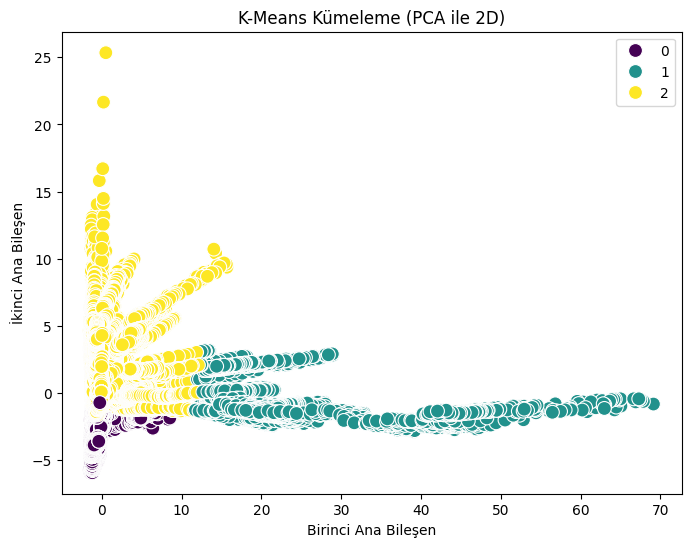

In [29]:
# PCA ile veriyi 2 boyuta indirgeme
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# PCA ile indirgenmiş veriyi görselleştirme
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='viridis', s=100)
plt.title('K-Means Kümeleme (PCA ile 2D)')
plt.xlabel('Birinci Ana Bileşen')
plt.ylabel('İkinci Ana Bileşen')
plt.show()


**8. Dirsek Yöntemi (Elbow Method) Kullanarak En Uygun K-Means Küme Sayısını Belirlemek:**

Bu kod, **Dirsek Yöntemi(Elbow Method)** kullanarak **K-Means** kümeleme algoritması için en uygun **k (küme sayısı)** değerini belirler. Kod, farklı k değerleri için modelin **inertia** değerlerini hesaplar ve bunları bir grafik üzerinde görselleştirir. Grafik üzerinde bir "dirsek" noktası gözlemlendiğinde, bu nokta genellikle en uygun küme sayısını temsil eder. Bu noktada, **inertia** değerindeki azalma oranı yavaşlar ve bu, modelin küme sayısındaki artışla birlikte daha iyi performans göstermediğini gösterir.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

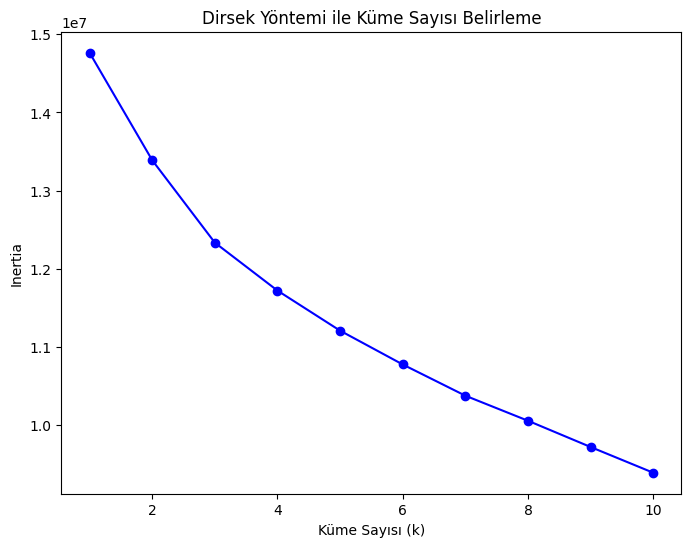

In [30]:
# Dirsek Yöntemi (Elbow Method) ile en uygun k değerini bulma
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Inertia değerlerini çizdirme
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Dirsek Yöntemi ile Küme Sayısı Belirleme')
plt.show()
